### Capstone Analytic Report - Tim Moriarity

#### Data - Kaggle Competiton - PUBG Finish Placement Prediction

    https://www.kaggle.com/c/pubg-finish-placement-prediction

This data being used is from a Kaggle competition;

"You are given over 65,000 games' worth of anonymized player data, split into training and testing sets, and asked to predict final placement from final in-game stats and initial player ratings." 
    
Data collected using the PUBG Developer API
    
    https://developer.pubg.com/
    
The games are played on a battleground where 100 players enter and compete to see who will be the last one standing. There are various items that can be collected to help accomplish this, but the game doesn't end until there is only one player left.

This PUBG or player unknown battleground style of gaming has become very popular recently and this competition looks to see what the best strategies are to win the game.

The dataset allows for analysis of player behavior during gameplay. This data is then to be used to predict player behavior.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing CSVs in Pandas
train = pd.read_csv('Data/PUGB/train.csv')
test = pd.read_csv('Data/PUGB/test.csv')
sample = pd.read_csv('Data/PUGB/sample_submission.csv')

#### For this report only the training dataset will be used

In [3]:
# putting the training set into a Pandas Dataframe
whole_set = pd.DataFrame(train)

##### Exploratory Analysis

In [4]:
whole_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4357336 entries, 0 to 4357335
Data columns (total 26 columns):
Id                 int64
groupId            int64
matchId            int64
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
maxPlace           int64
numGroups          int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(20)
memory usage: 864.3 MB


The various data columns included in the training dataset, with their respective data types

    - winPlacePerc is the column trying to be predicted

In [5]:
# splitting the dataset into bad, good, better, best players 
# based on winning %

bad = whole_set[whole_set['winPlacePerc']<.5]
good_ = whole_set[whole_set['winPlacePerc'] >=.5]
good = good_[good_['winPlacePerc']<.75]
better_ = whole_set[whole_set['winPlacePerc'] >=.75]
better = better_[better_['winPlacePerc'] <.95]
best_ = whole_set[whole_set['winPlacePerc']>=.95]
best = best_[best_['winPlacePerc']<1]
winners = whole_set[whole_set['winPlacePerc']==1]

In [6]:
len(whole_set)

4357336

The size of the dataset is 4357336 games played. Which makes sense since Kaggle said the dataset was roughly 65,000 games and each game has 100 players.

In [7]:
#herefore of the training set is 

print('The training set is',len(whole_set)/(len(whole_set)+len(test)), '% of the total dataset including both Test and Training')

The training set is 0.6999456567922022 % of the total dataset including both Test and Training


Which makes sense that the training set would be about twice the size of the test set

### Question 1: 
What are the Descriptive Statistics for the chosen columns?

In [8]:
whole_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4357336 entries, 0 to 4357335
Data columns (total 26 columns):
Id                 int64
groupId            int64
matchId            int64
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
maxPlace           int64
numGroups          int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(20)
memory usage: 864.3 MB


In [9]:
# columns picked for analysis, done based on personal limited game knowledge

picked_columns = ['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals', 'kills', 'revives', 'vehicleDestroys', 'weaponsAcquired']

# Adjusted Dataframe to only columns I want to examine
picked_set = whole_set[picked_columns]
picked_set

# Adjust Player Type Dataframes
bad_picked = bad[picked_columns]
good_picked = good[picked_columns]
better_picked = better[picked_columns]
best_picked = best[picked_columns]
winners_picked = winners[picked_columns]

In [10]:
#list of dataframes
player_type_dfs = [picked_set, bad_picked, good_picked, better_picked, best_picked, winners_picked]

# list of dataframe names
player_type_names = ['picked_set', 'bad', 'good', 'better', 'best', 'winners']

player_type_names

['picked_set', 'bad', 'good', 'better', 'best', 'winners']

In [11]:
picked_set.head()

,assists,boosts,damageDealt,headshotKills,heals,kills,revives,vehicleDestroys,weaponsAcquired
0,0,5,247.30,0,4,2,1,0,4
1,1,0,37.65,1,0,1,0,0,3
2,0,1,93.73,0,2,0,1,0,5
3,0,0,95.88,0,0,0,0,0,1
4,0,1,0.00,0,1,0,0,0,4


In [12]:
# Function to Deliver Descriptive Stats
def descriptive_stats_by_stat_type(list_of_df, list_of_dfNames):
    print('Max Values by Column and Grouped by Player Type \n')
    for (df, name) in zip(list_of_df, list_of_dfNames):
        print(name)
        print(df.max())
        print('\n')
        
    print('Min Values by Column and Grouped by Player Type \n')
    for (df, name) in zip(list_of_df, list_of_dfNames):
        print(name)
        print(df.min())
        print('\n')
    
    print('Mean Values by Column and Grouped by Player Type \n')
    for (df, name) in zip(list_of_df, list_of_dfNames):
        print(name)
        print(df.mean())
        print('\n')
        
    print('Median Values by Column and Grouped by Player Type \n')
    for (df, name) in zip(list_of_df, list_of_dfNames):
        print(name)
        print(df.median())
        print('\n')
        
    print('Mode Values by Column and Grouped by Player Type \n')
    for (df, name) in zip(list_of_df, list_of_dfNames):
        print(name)
        print(df.mode())
        print('\n')
    
    print('Standard Deviation Values by Column and Grouped by Player Type \n')
    for (df, name) in zip(list_of_df, list_of_dfNames):
        print(name)
        print(df.std())
        print('\n')
    return

In [13]:
descriptive_stats_by_stat_type(player_type_dfs, player_type_names)

Max Values by Column and Grouped by Player Type 

picked_set
assists              20.0
boosts               18.0
damageDealt        6384.0
headshotKills        26.0
heals                59.0
kills                60.0
revives              41.0
vehicleDestroys       5.0
weaponsAcquired      76.0
dtype: float64


bad
assists              14.0
boosts               10.0
damageDealt        3586.0
headshotKills        12.0
heals                31.0
kills                32.0
revives              20.0
vehicleDestroys       2.0
weaponsAcquired      76.0
dtype: float64


good
assists              16.0
boosts               13.0
damageDealt        3366.0
headshotKills        16.0
heals                59.0
kills                33.0
revives              41.0
vehicleDestroys       3.0
weaponsAcquired      69.0
dtype: float64


better
assists              17.0
boosts               17.0
damageDealt        4032.0
headshotKills        18.0
heals                58.0
kills                41.0
revives       

assists              0.585937
boosts               1.233098
damageDealt        150.054255
headshotKills        0.563736
heals                2.481150
kills                1.377255
revives              0.500490
vehicleDestroys      0.088500
weaponsAcquired      2.222696
dtype: float64


better
assists              0.788372
boosts               1.833518
damageDealt        202.152444
headshotKills        0.770554
heals                3.211402
kills                1.887492
revives              0.609086
vehicleDestroys      0.101373
weaponsAcquired      2.314719
dtype: float64


best
assists              0.944760
boosts               2.235416
damageDealt        250.059494
headshotKills        0.986476
heals                3.379639
kills                2.333619
revives              0.686106
vehicleDestroys      0.111477
weaponsAcquired      2.127590
dtype: float64


winners
assists              1.304592
boosts               2.257761
damageDealt        317.012820
headshotKills        1.319092

A quick look at the results show some unsurprising things, like that the minimum values are all zero.  Also that most of the stats increase  as the quality of the players get better.

The mode, does show a positive trend between weapons acquired and the quality of the player. Damage dealt also has a postive trend with player quality.

### Question 2:
What columns in the list below have the strongest correlation with a higher winPlacePerc?

    - Kills
    - Headshot Kills
    - Boosts
    - Heals
    - Revives
    - Damage
    - Assists
    - Weapons Acquired
    - Vehicles Destroyed

#### Boxplots By Category

In [14]:
def boxplotter_by_player_type(column):

    print(column, " brokendown by player type")
    
    plt.figure(figsize=(30,30))
    plt.ylim(whole_set[column].min(), whole_set[column].quantile(.99))
    
    plt.subplot(2,3,1)
    plt.boxplot(whole_set[column])
    plt.ylabel('Count')
    plt.title('All')

    plt.subplot(2,3,2)
    plt.boxplot(bad[column])
    plt.ylabel('Count')
    plt.title('Bad')

    plt.subplot(2,3,3)
    plt.boxplot(good[column])
    plt.ylabel('Count')
    plt.title('Good')

    plt.subplot(2,3,4)
    plt.boxplot(better[column])
    plt.ylabel('Count')
    plt.title('Better')

    plt.subplot(2,3,5)
    plt.boxplot(best[column])
    plt.ylabel('Count')
    plt.title('Best')

    plt.subplot(2,3,6)
    plt.boxplot(winners[column])
    plt.ylabel('Count')
    plt.title('Winners')
    
    return plt.show()


assists  brokendown by player type


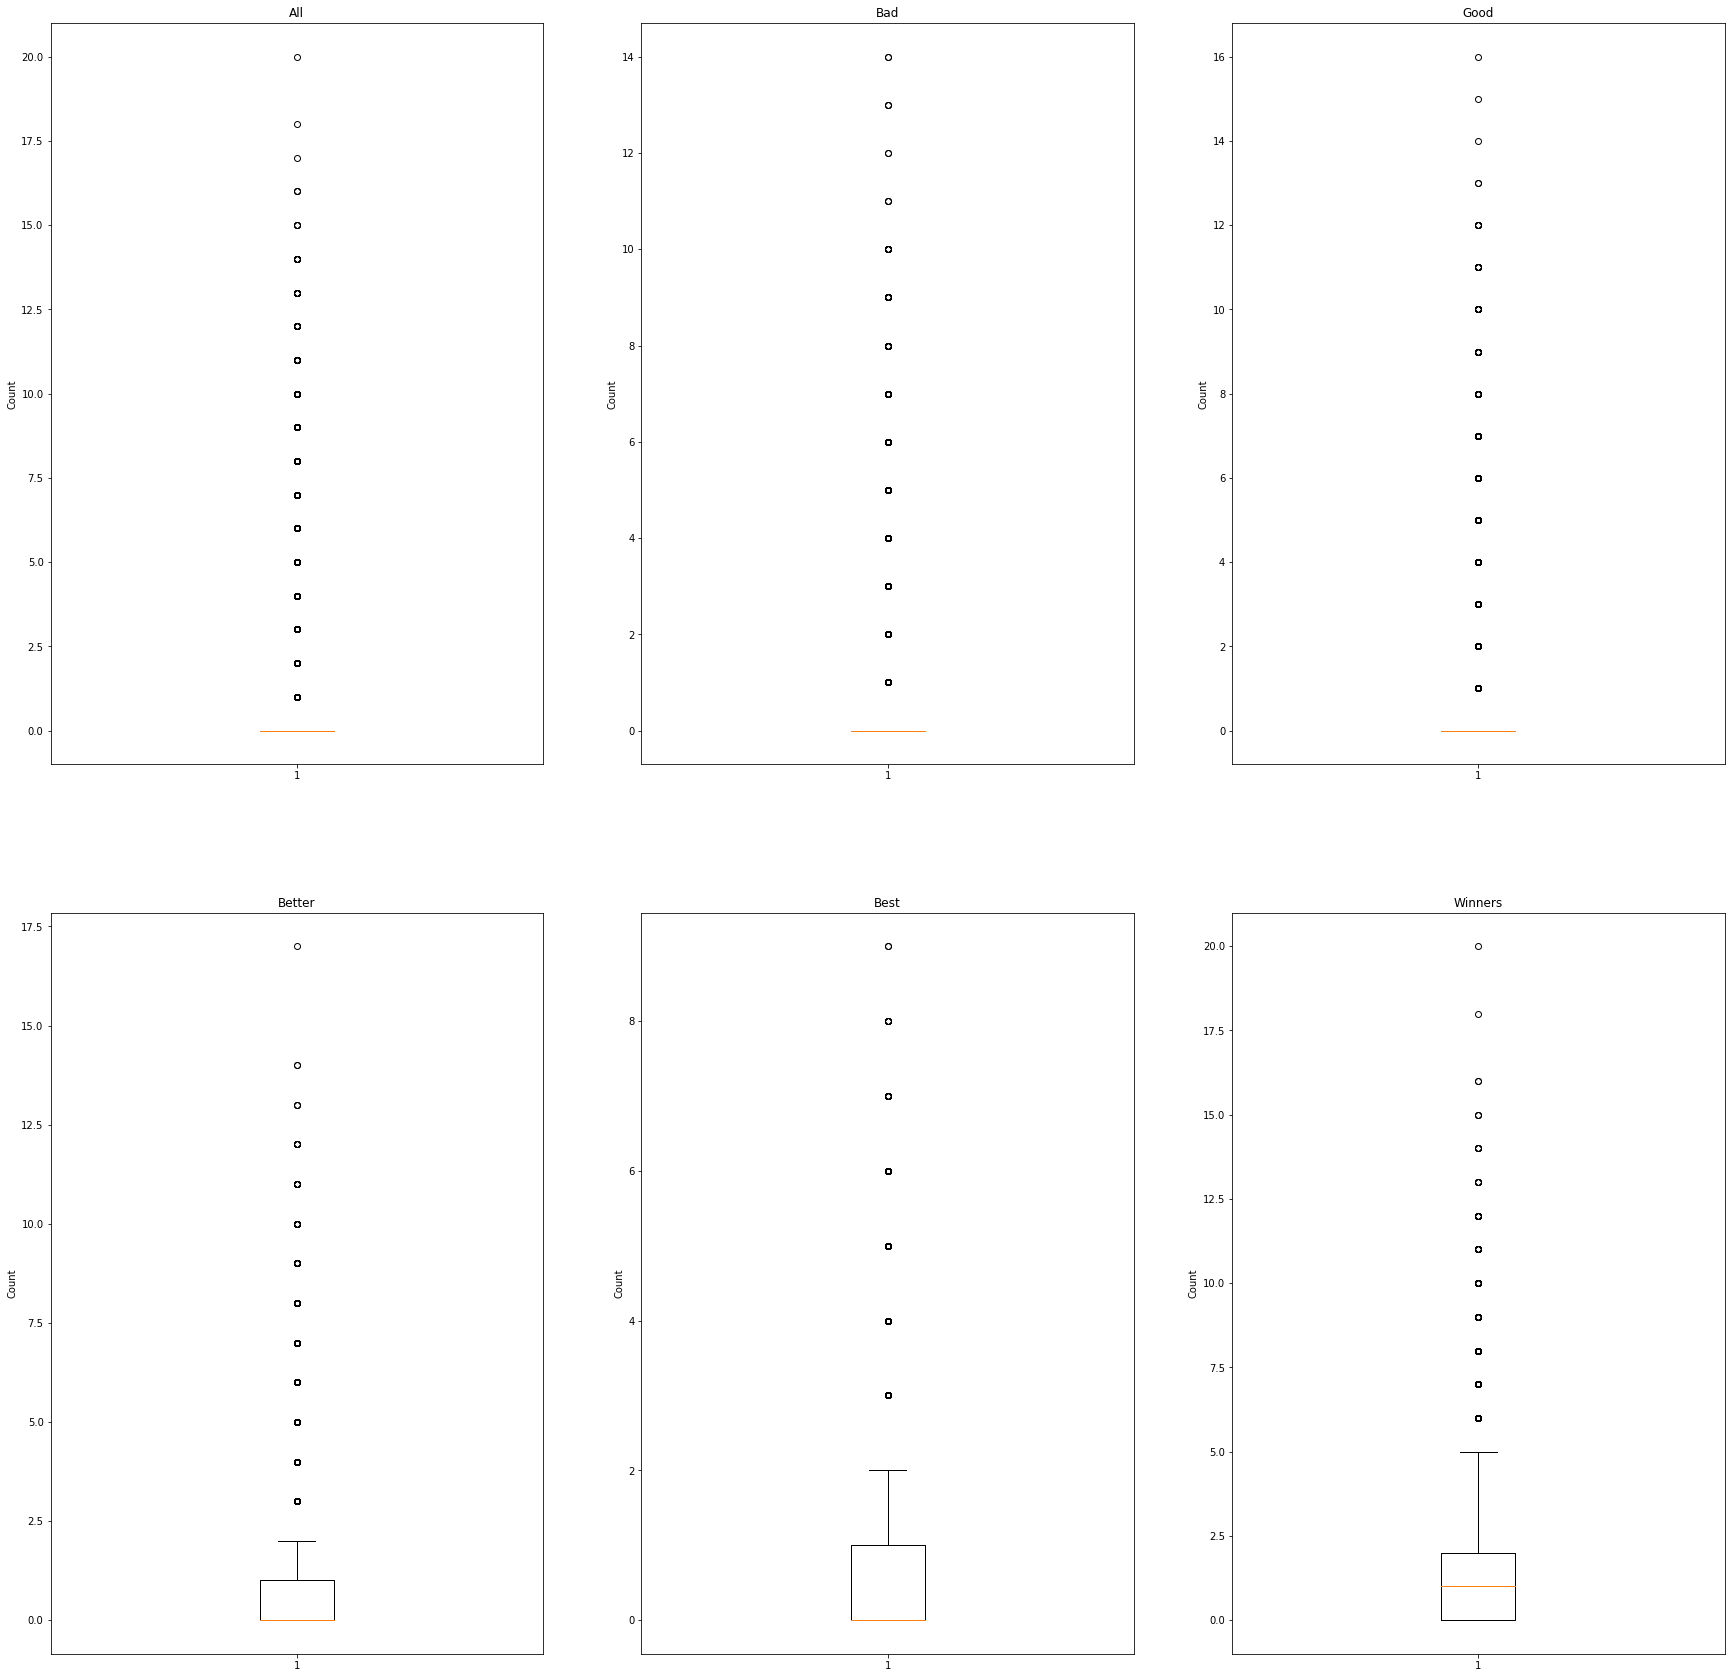

boosts  brokendown by player type


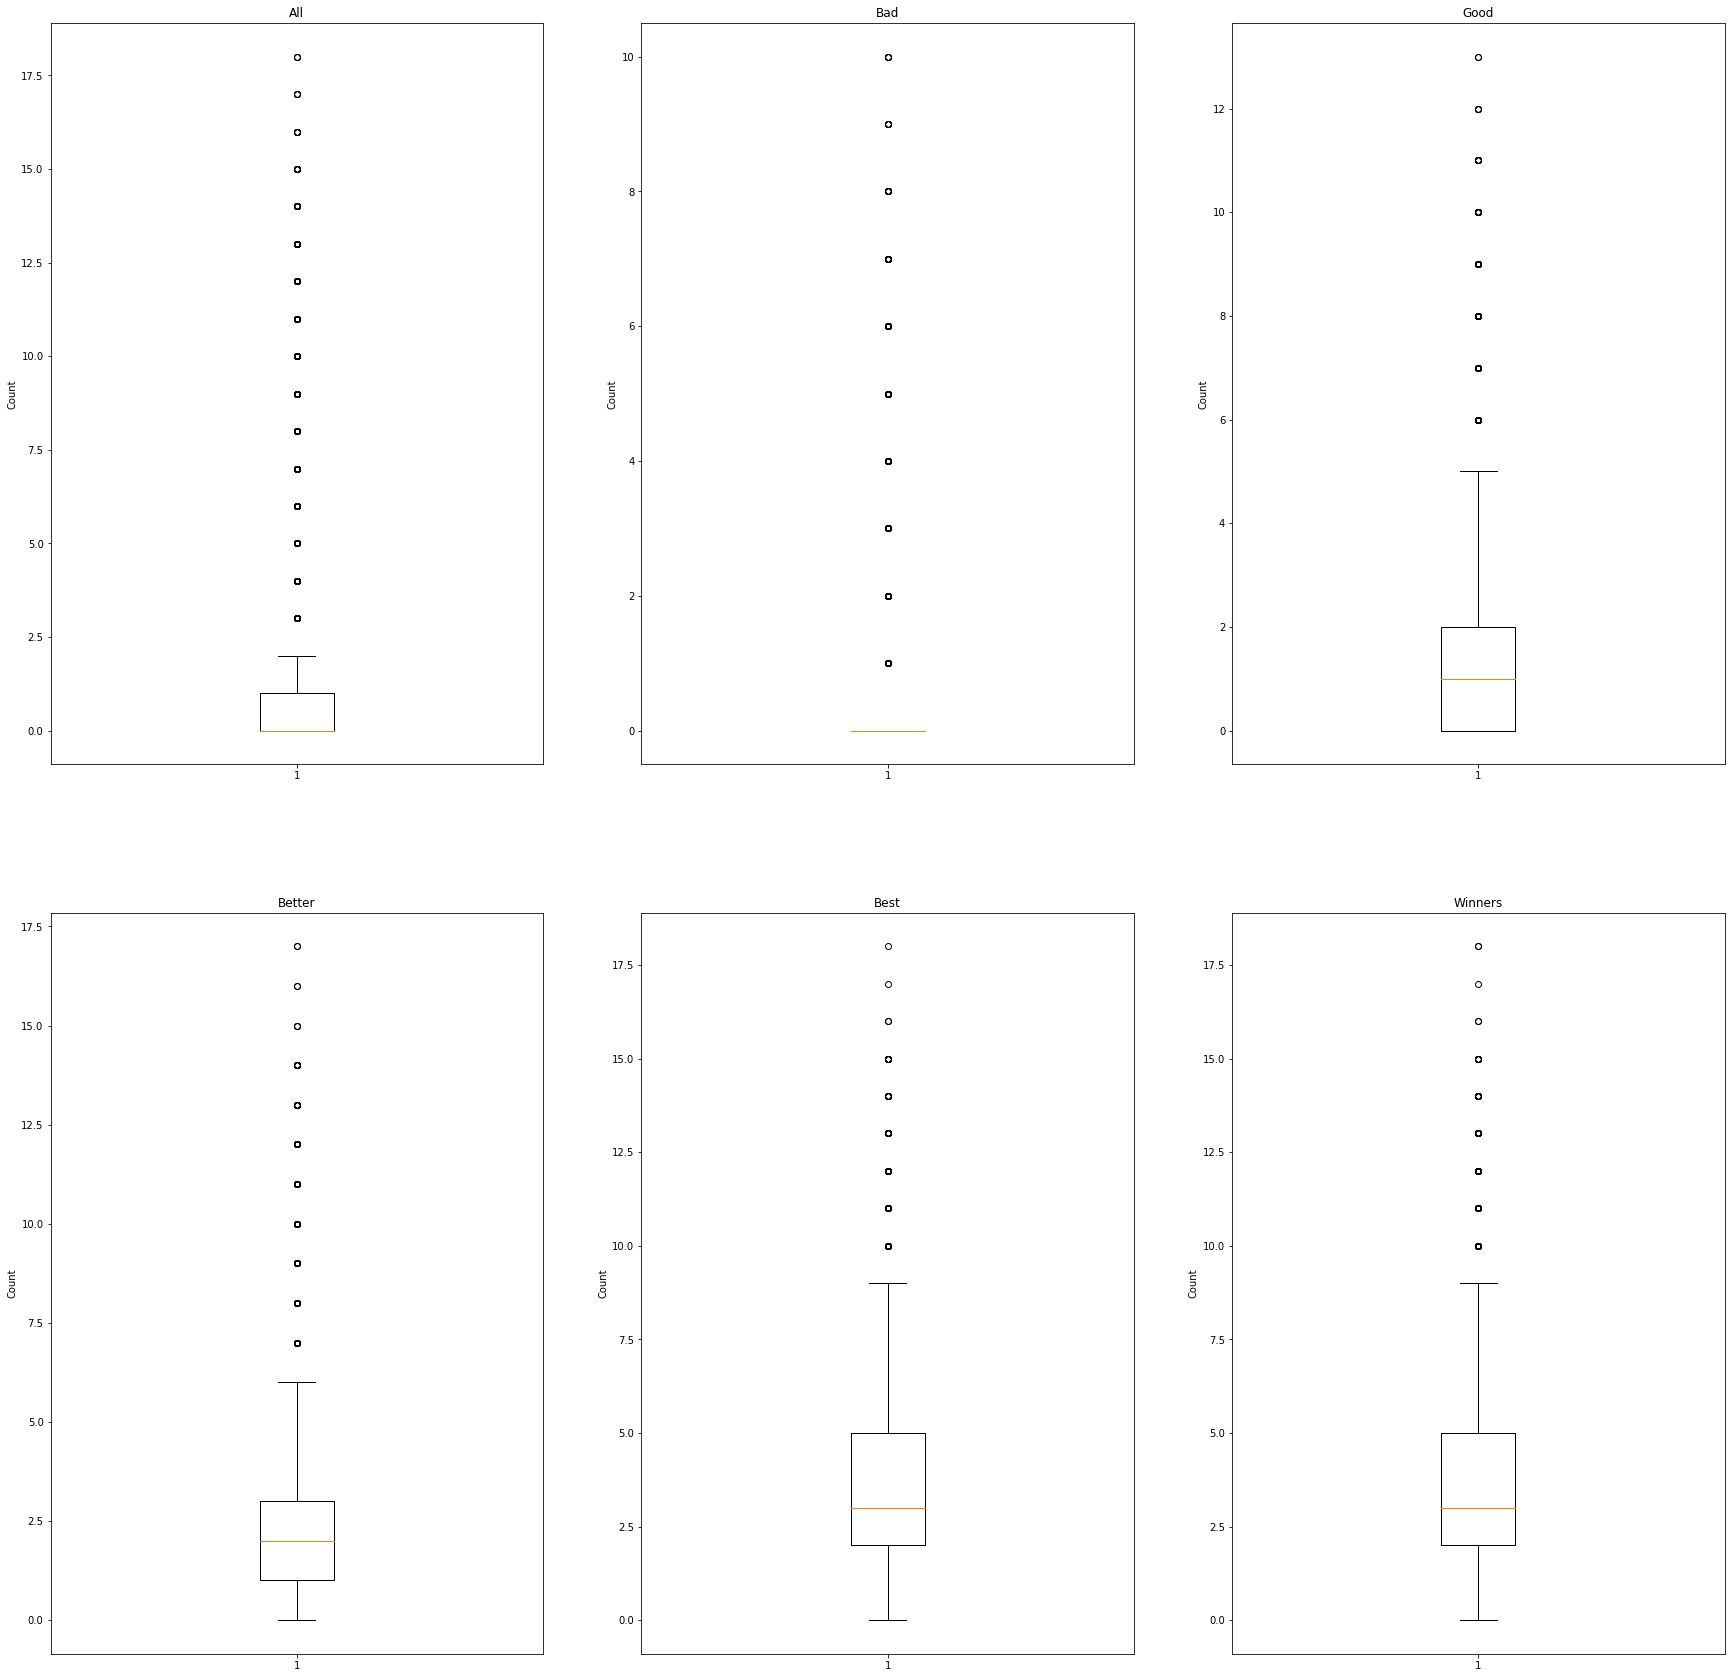

damageDealt  brokendown by player type


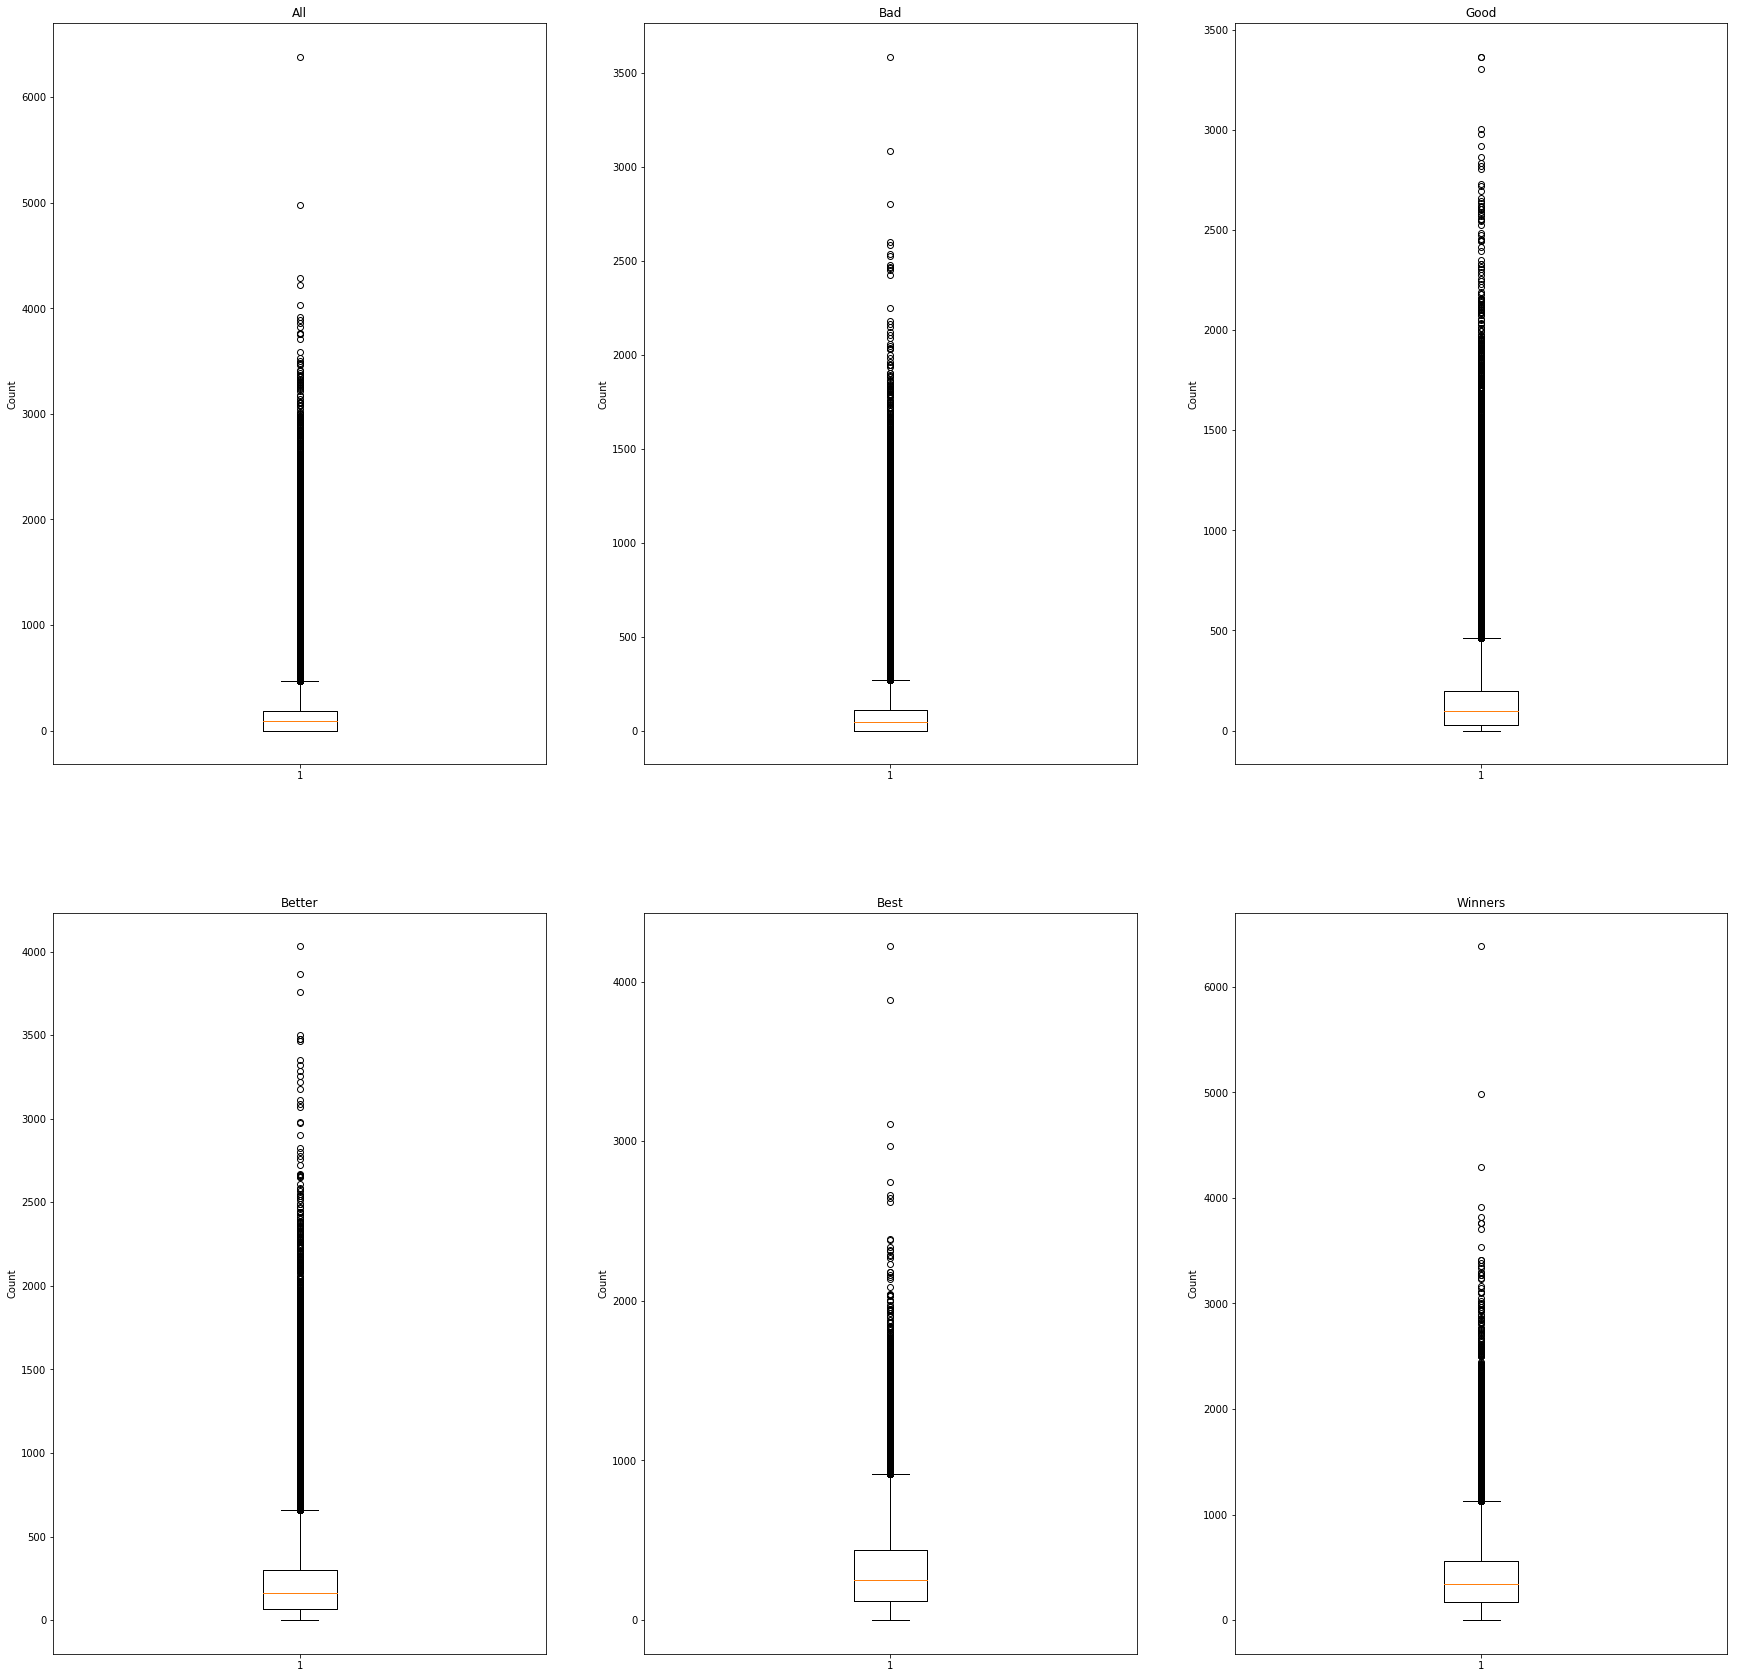

headshotKills  brokendown by player type


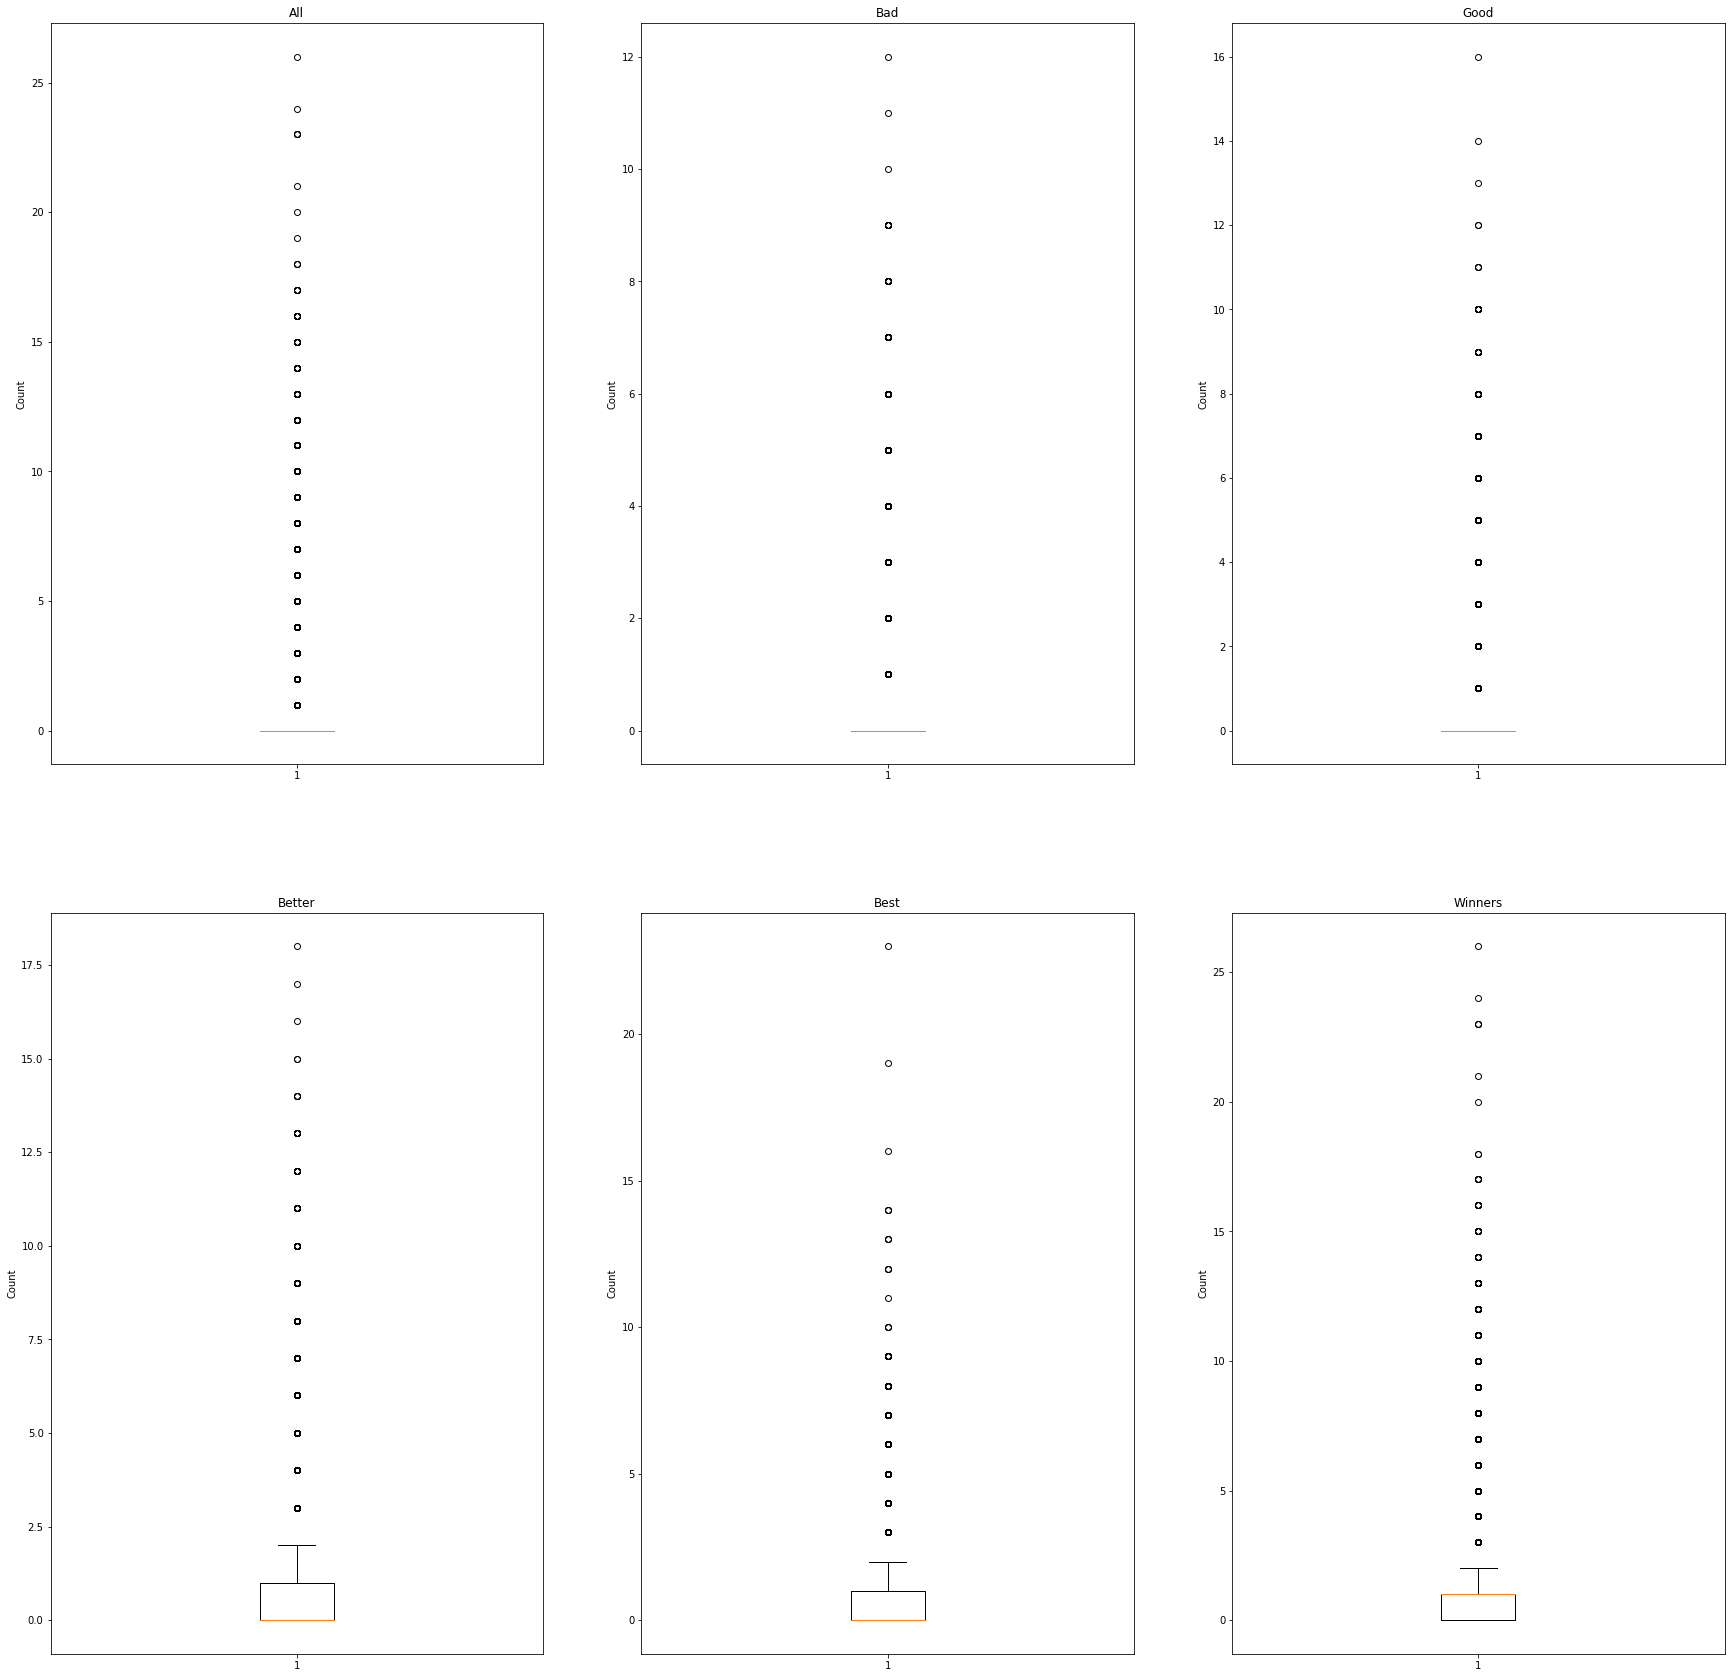

heals  brokendown by player type


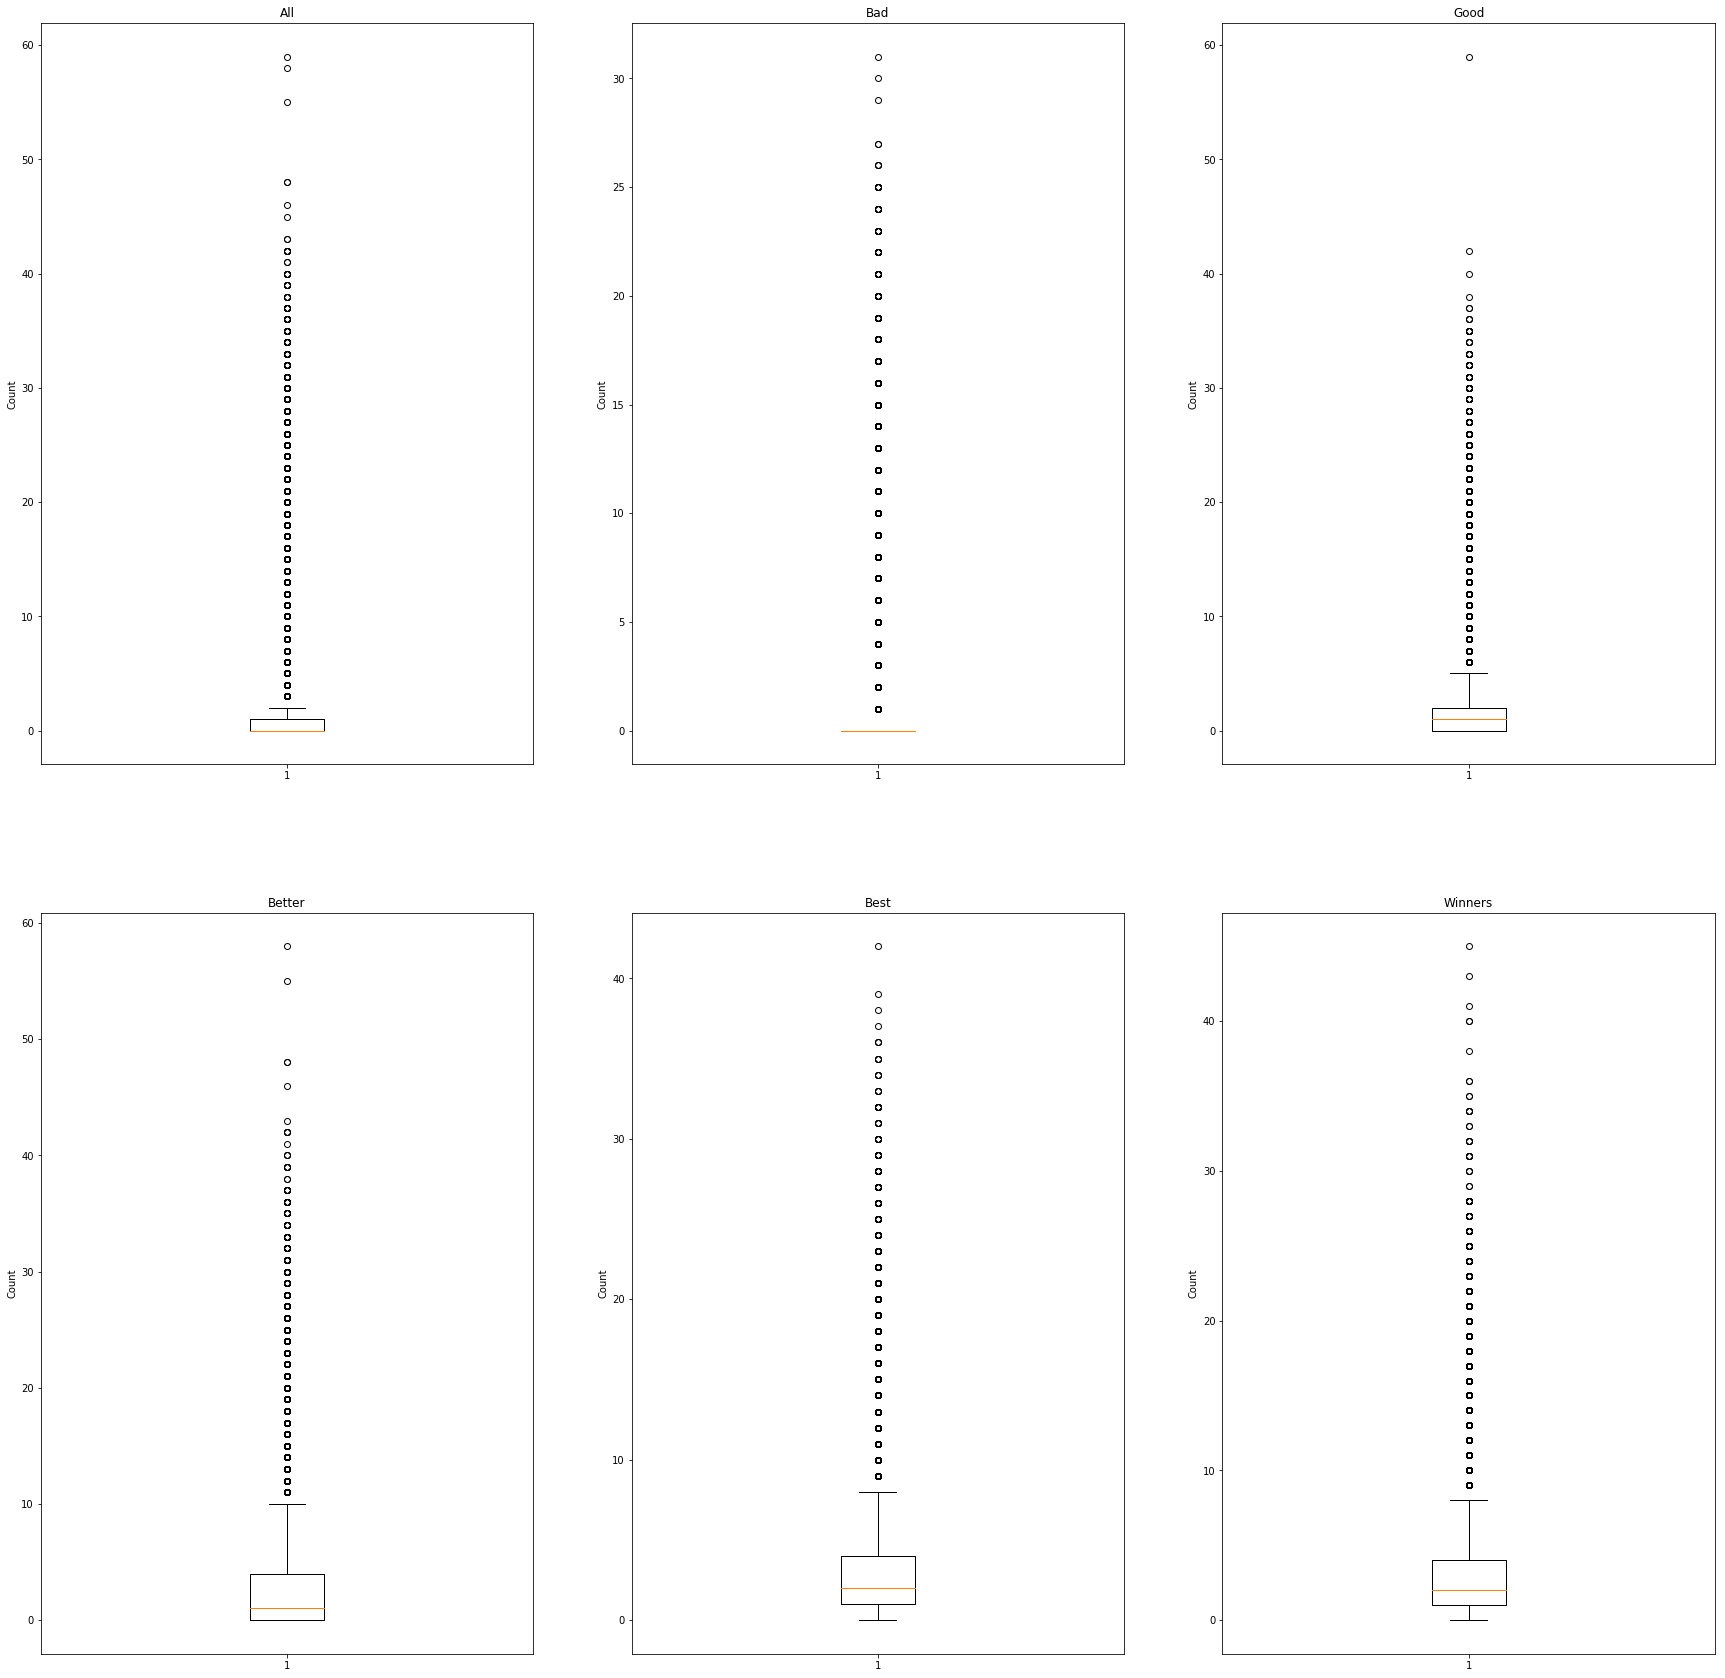

kills  brokendown by player type


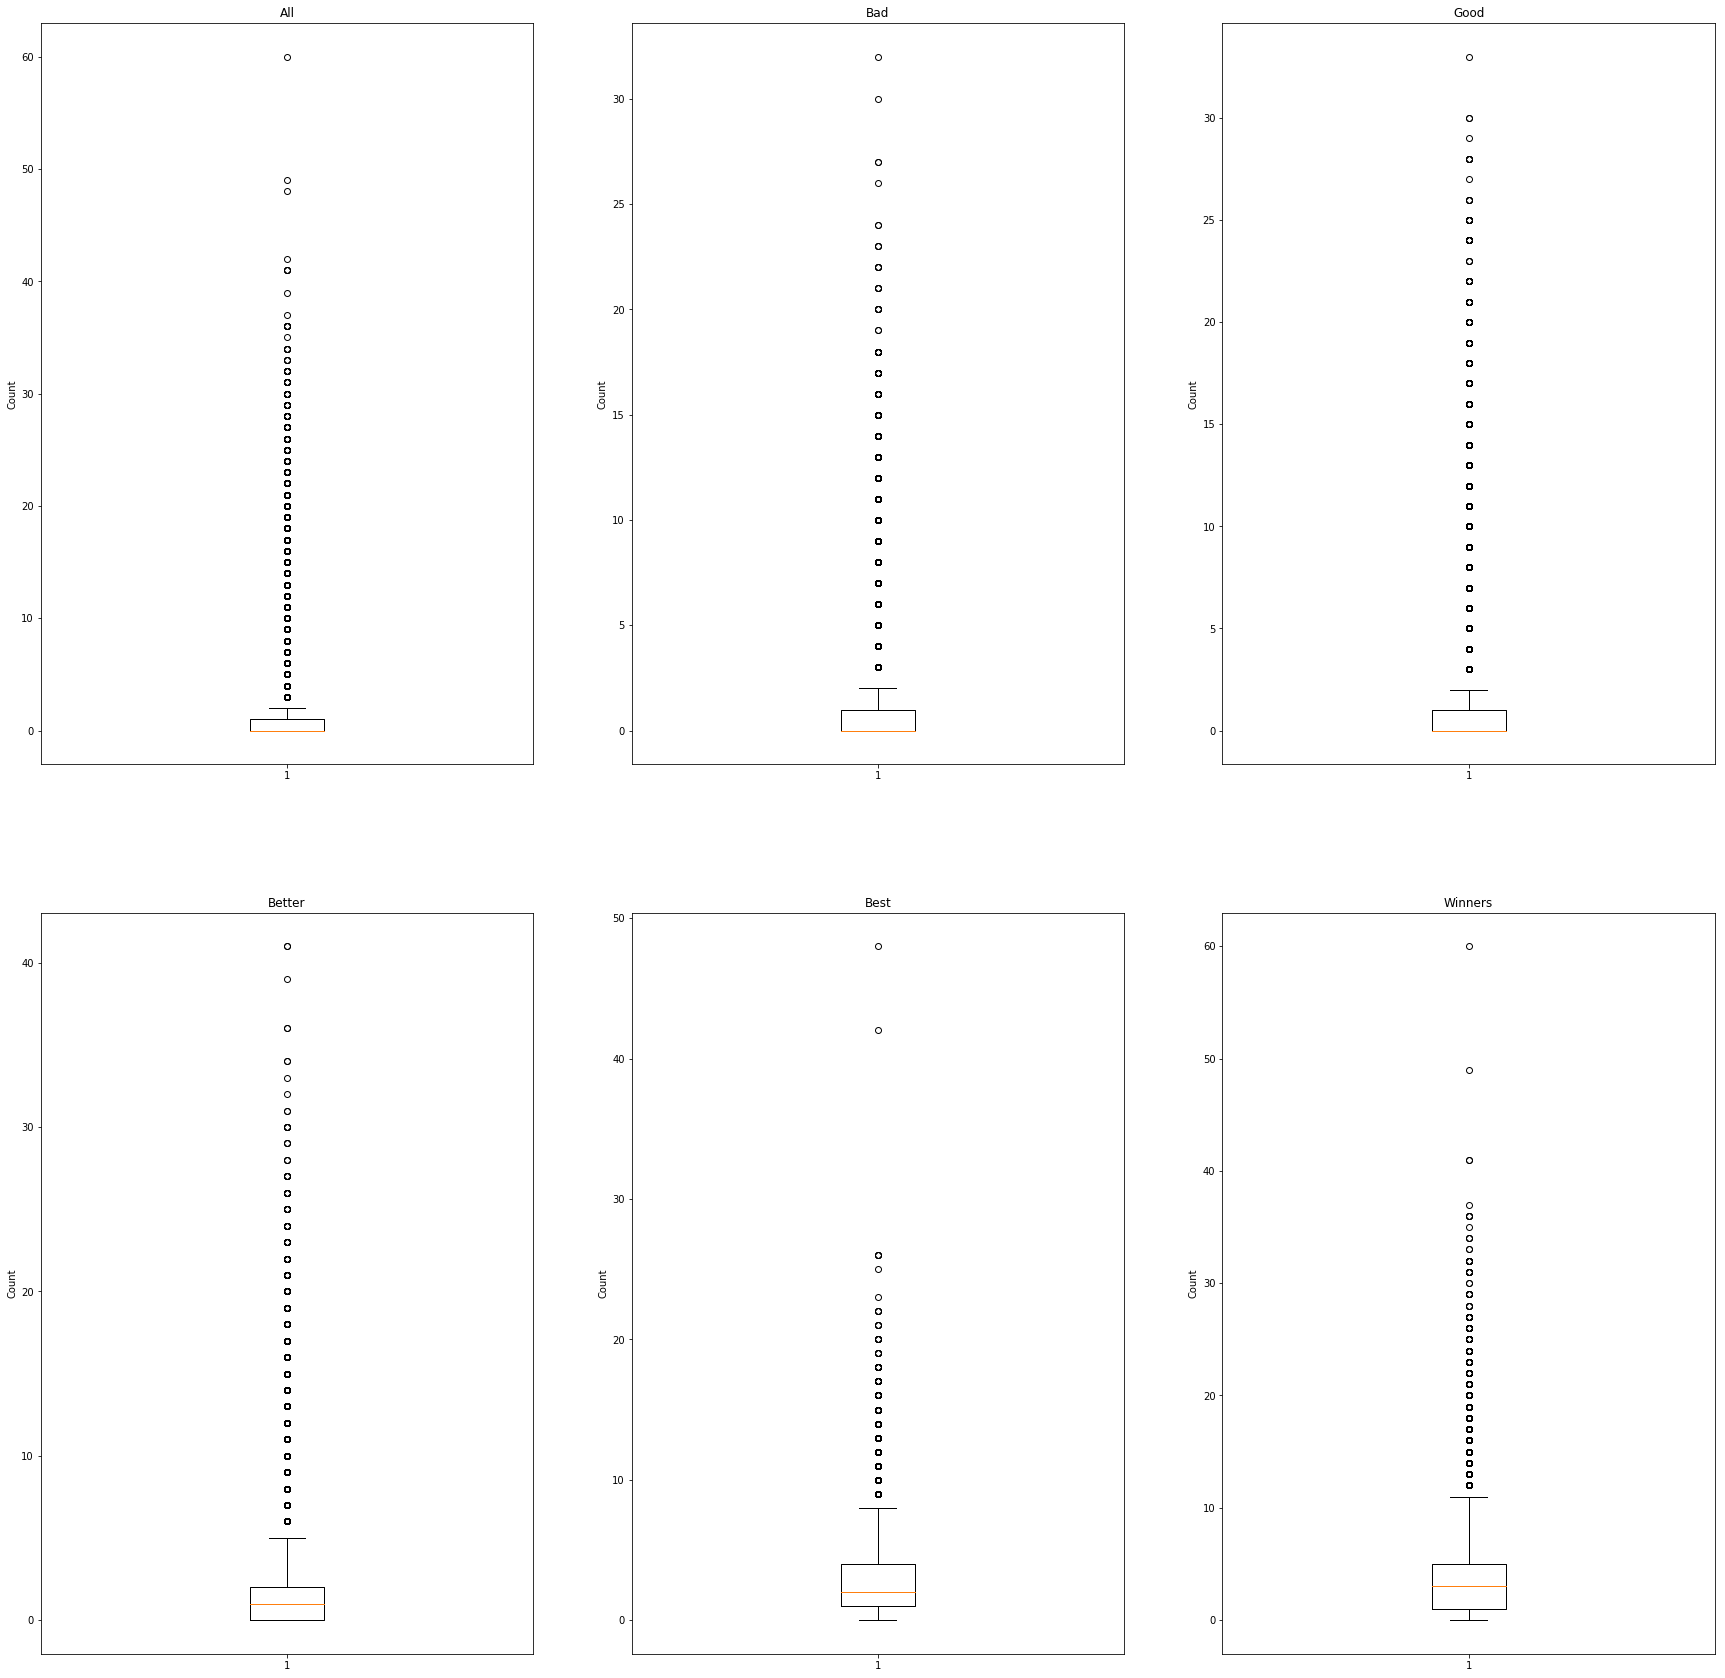

revives  brokendown by player type


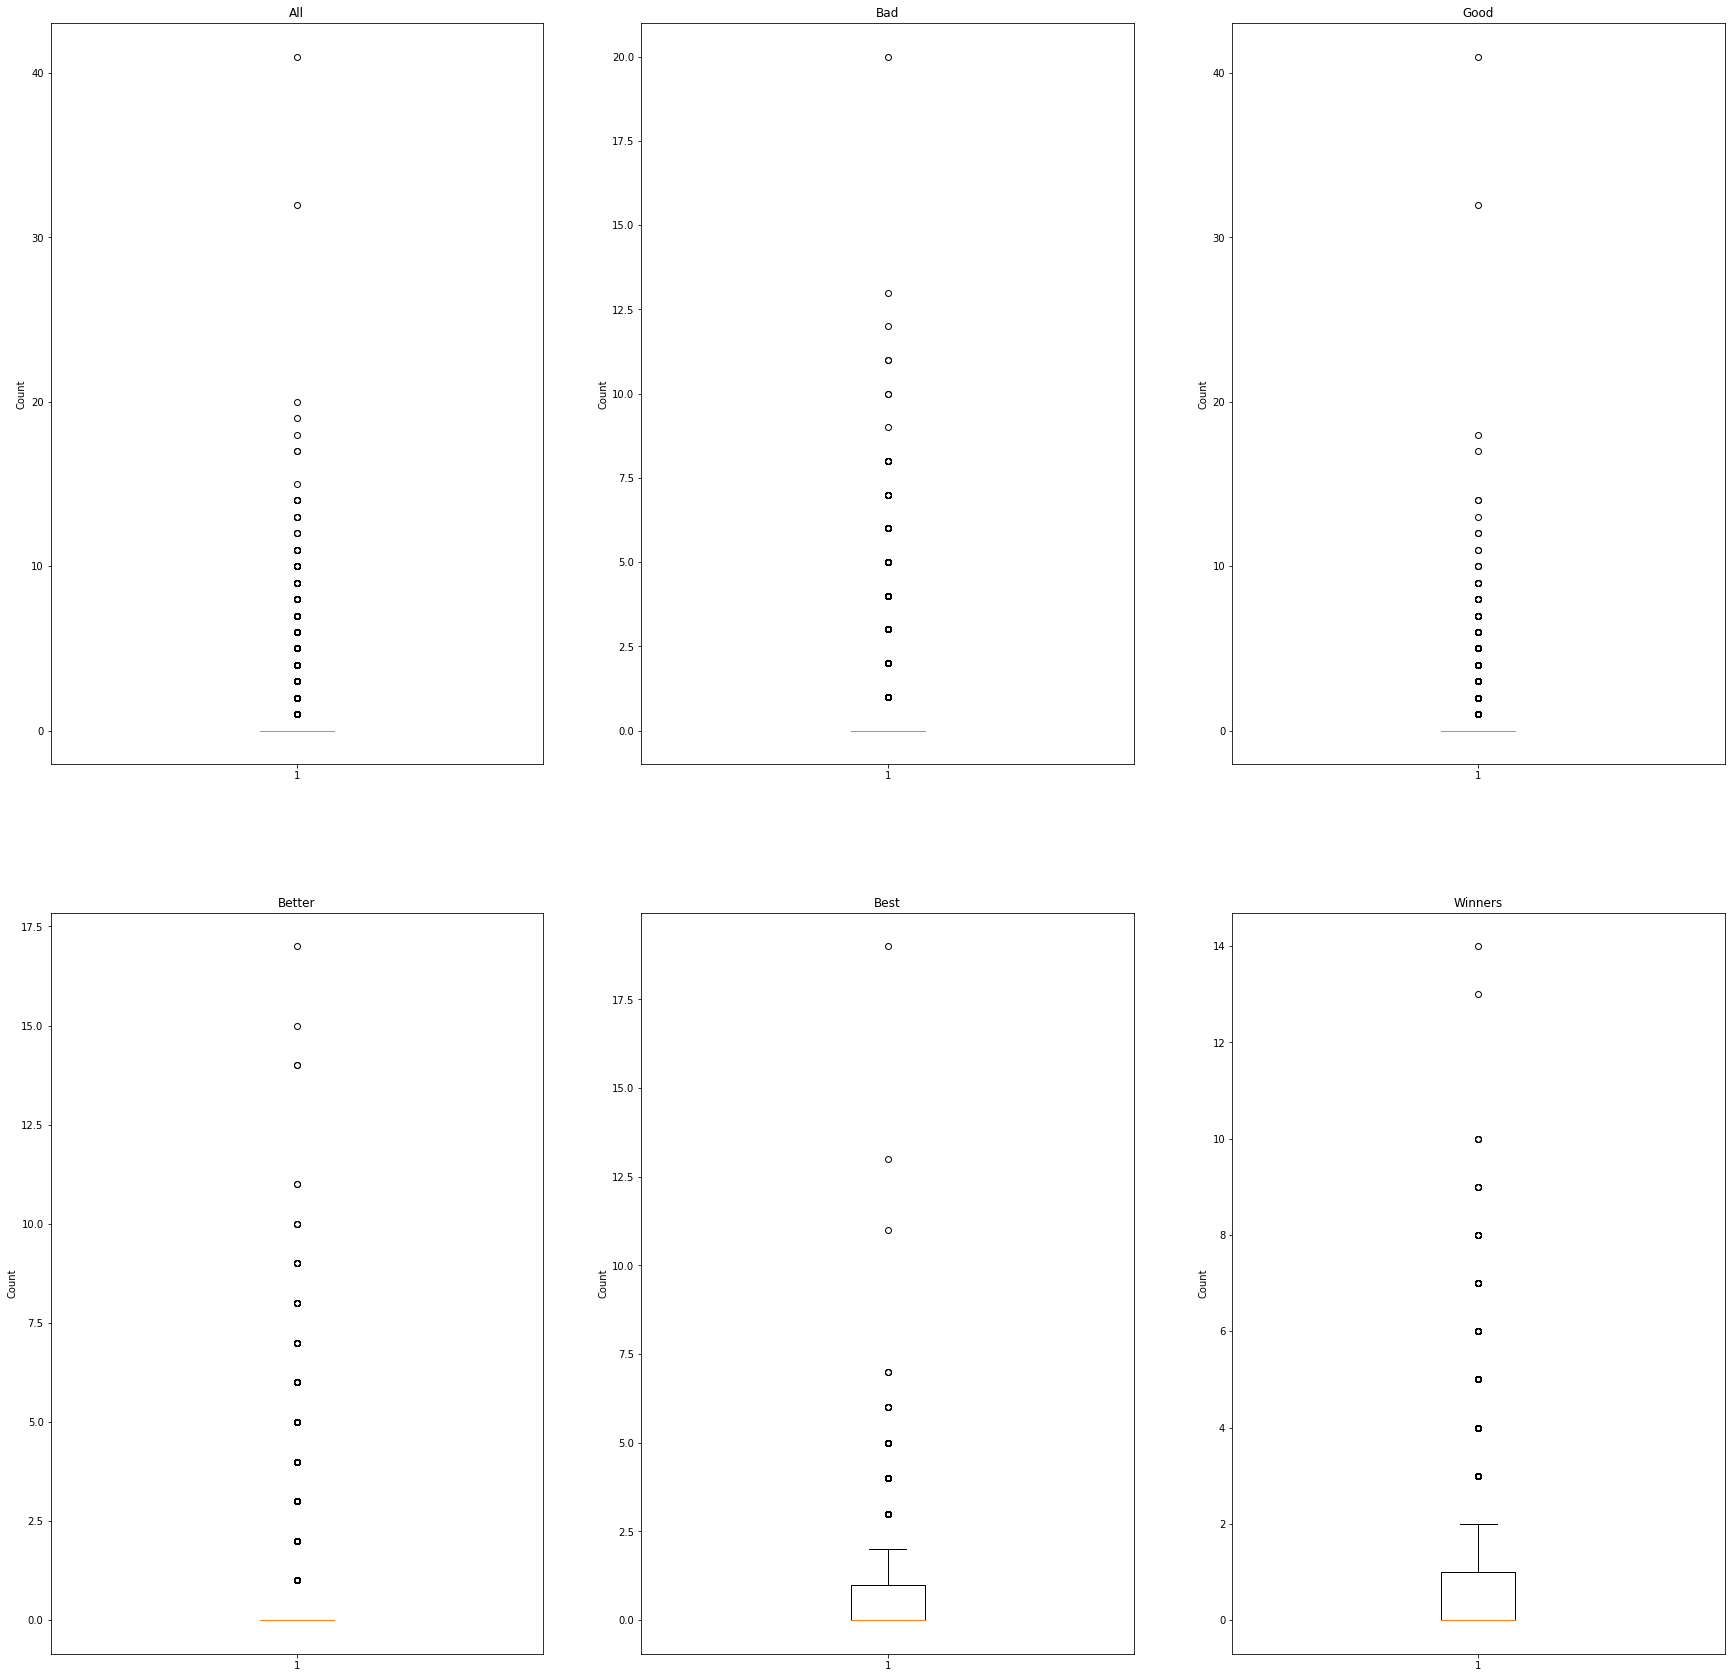

vehicleDestroys  brokendown by player type


C:\Users\polluxs\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


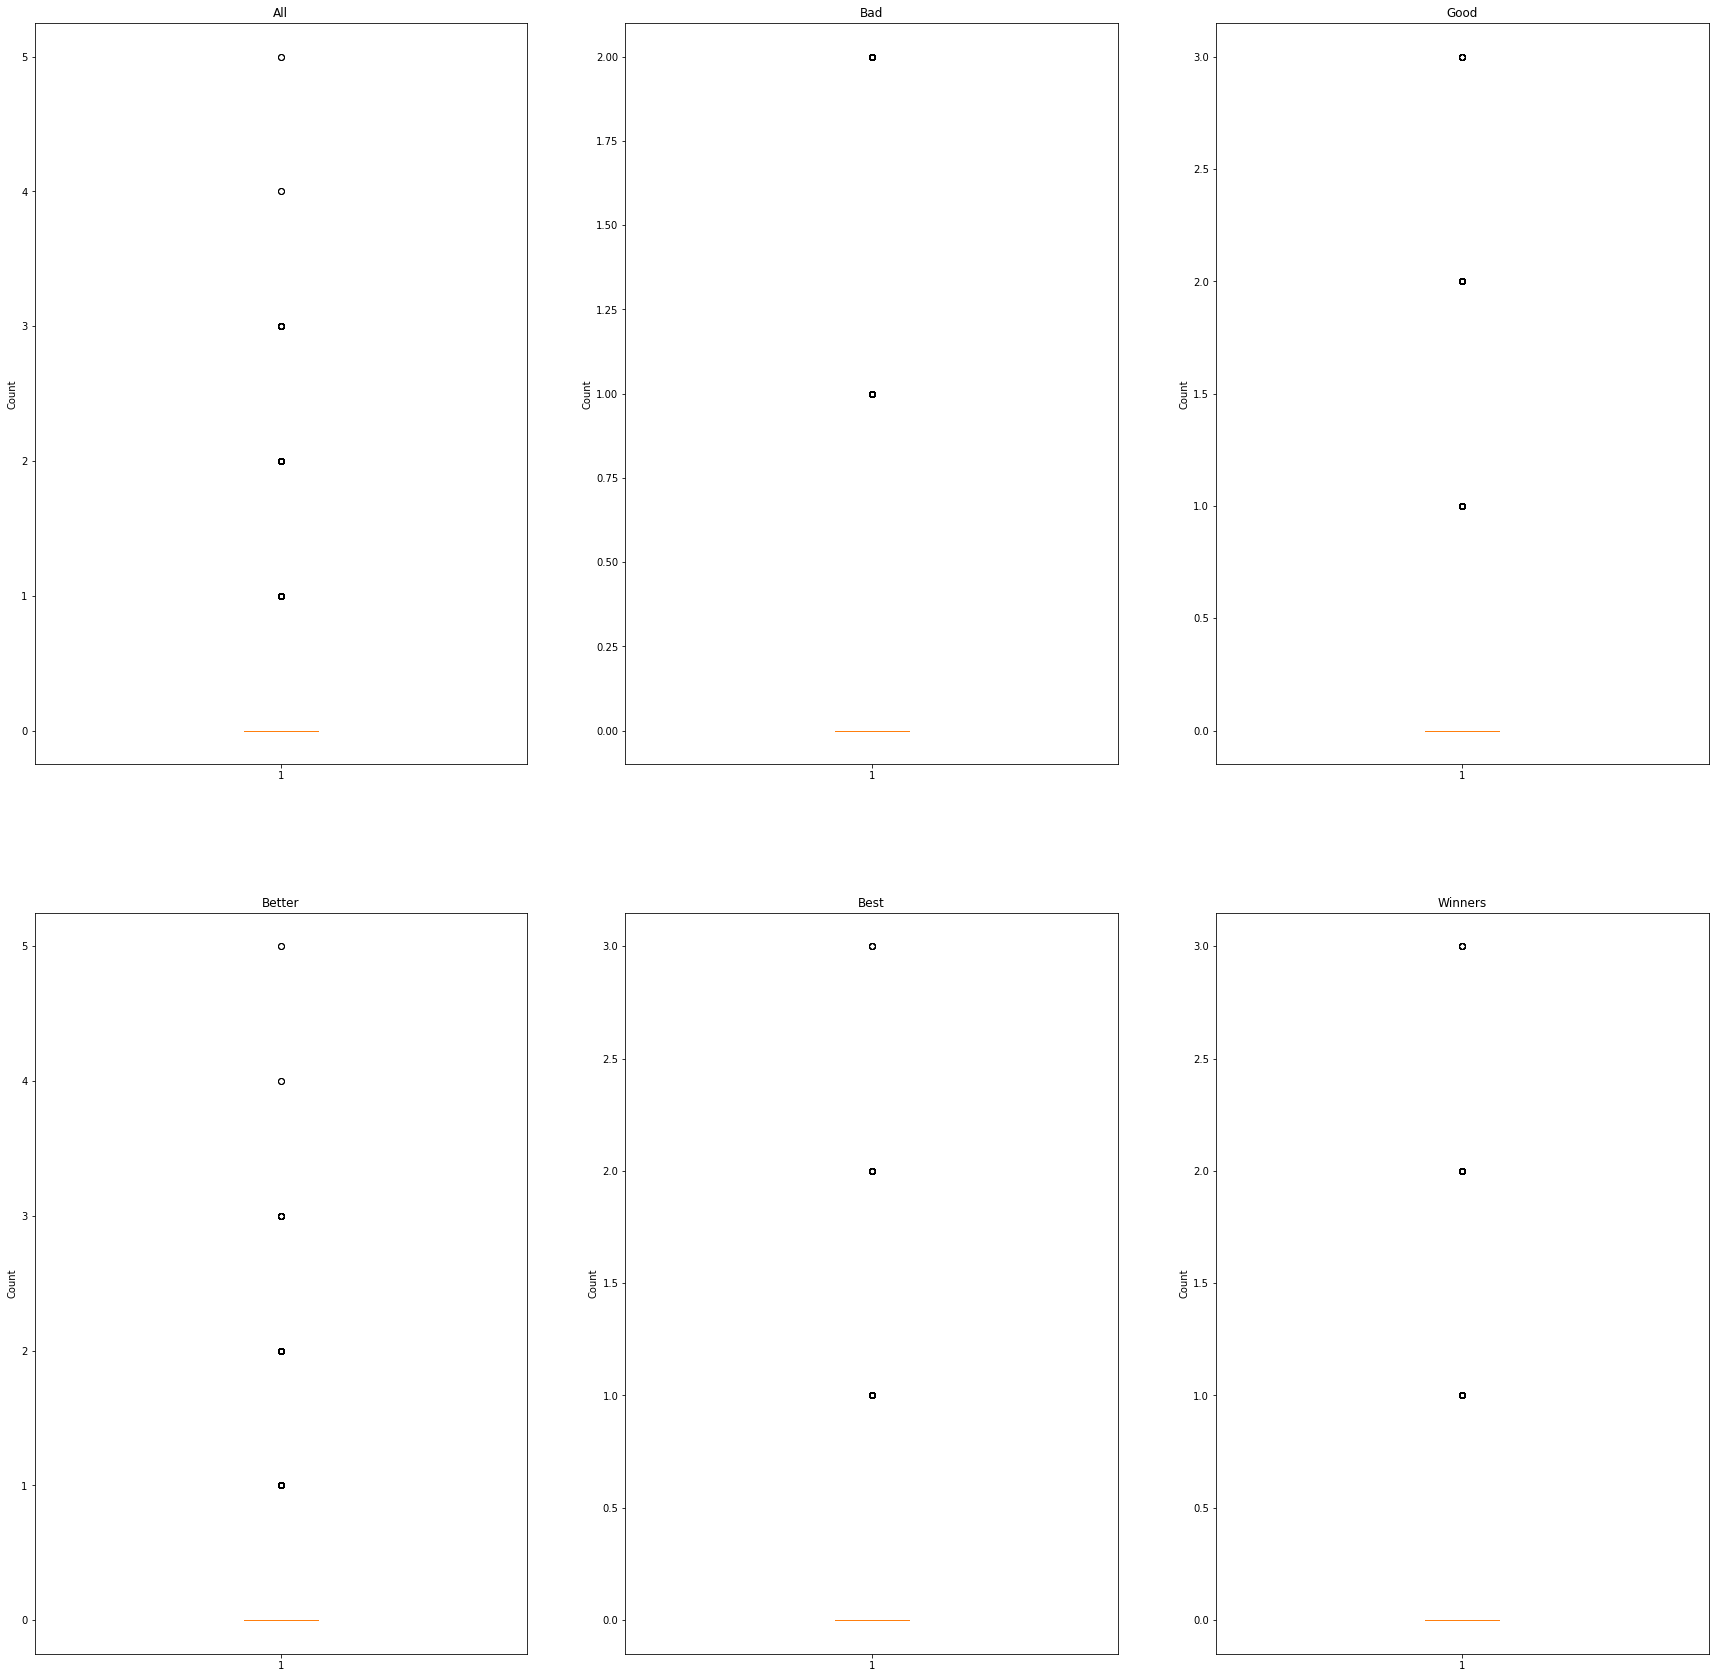

weaponsAcquired  brokendown by player type


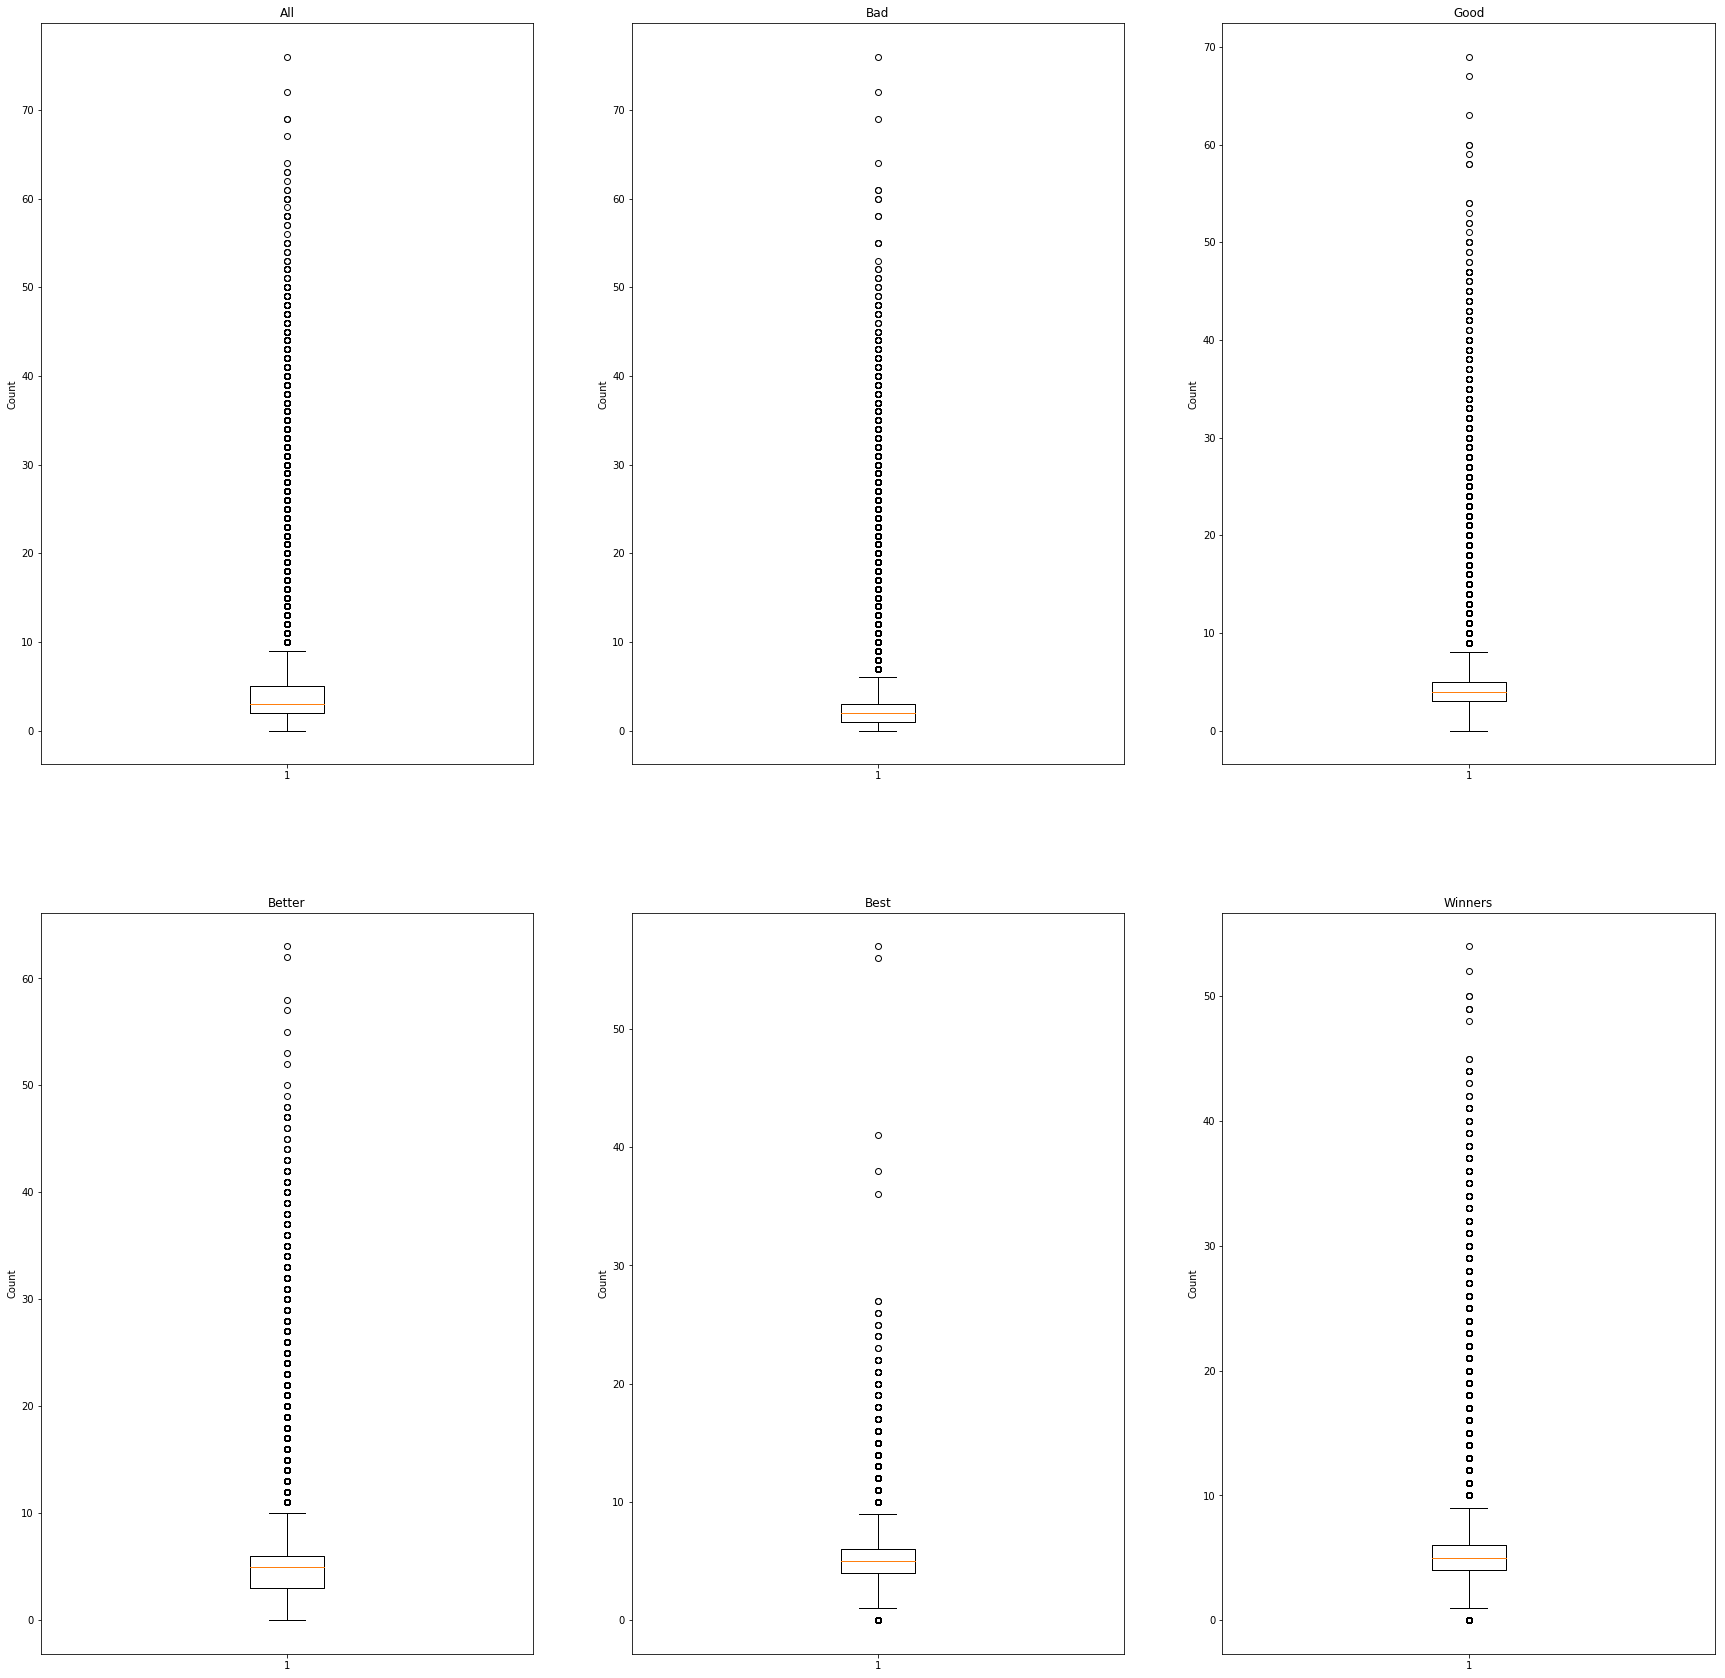

In [15]:
for column in picked_columns:
    boxplotter_by_player_type(column)

There seems to be a strategy of going for boosts that leads to greater player success. 

As with the descriptive statistics the boxplots show that there is a positive trend between the quality of the players and the quantity of the various counting statistics being measured

#### Scatter Plot by Category

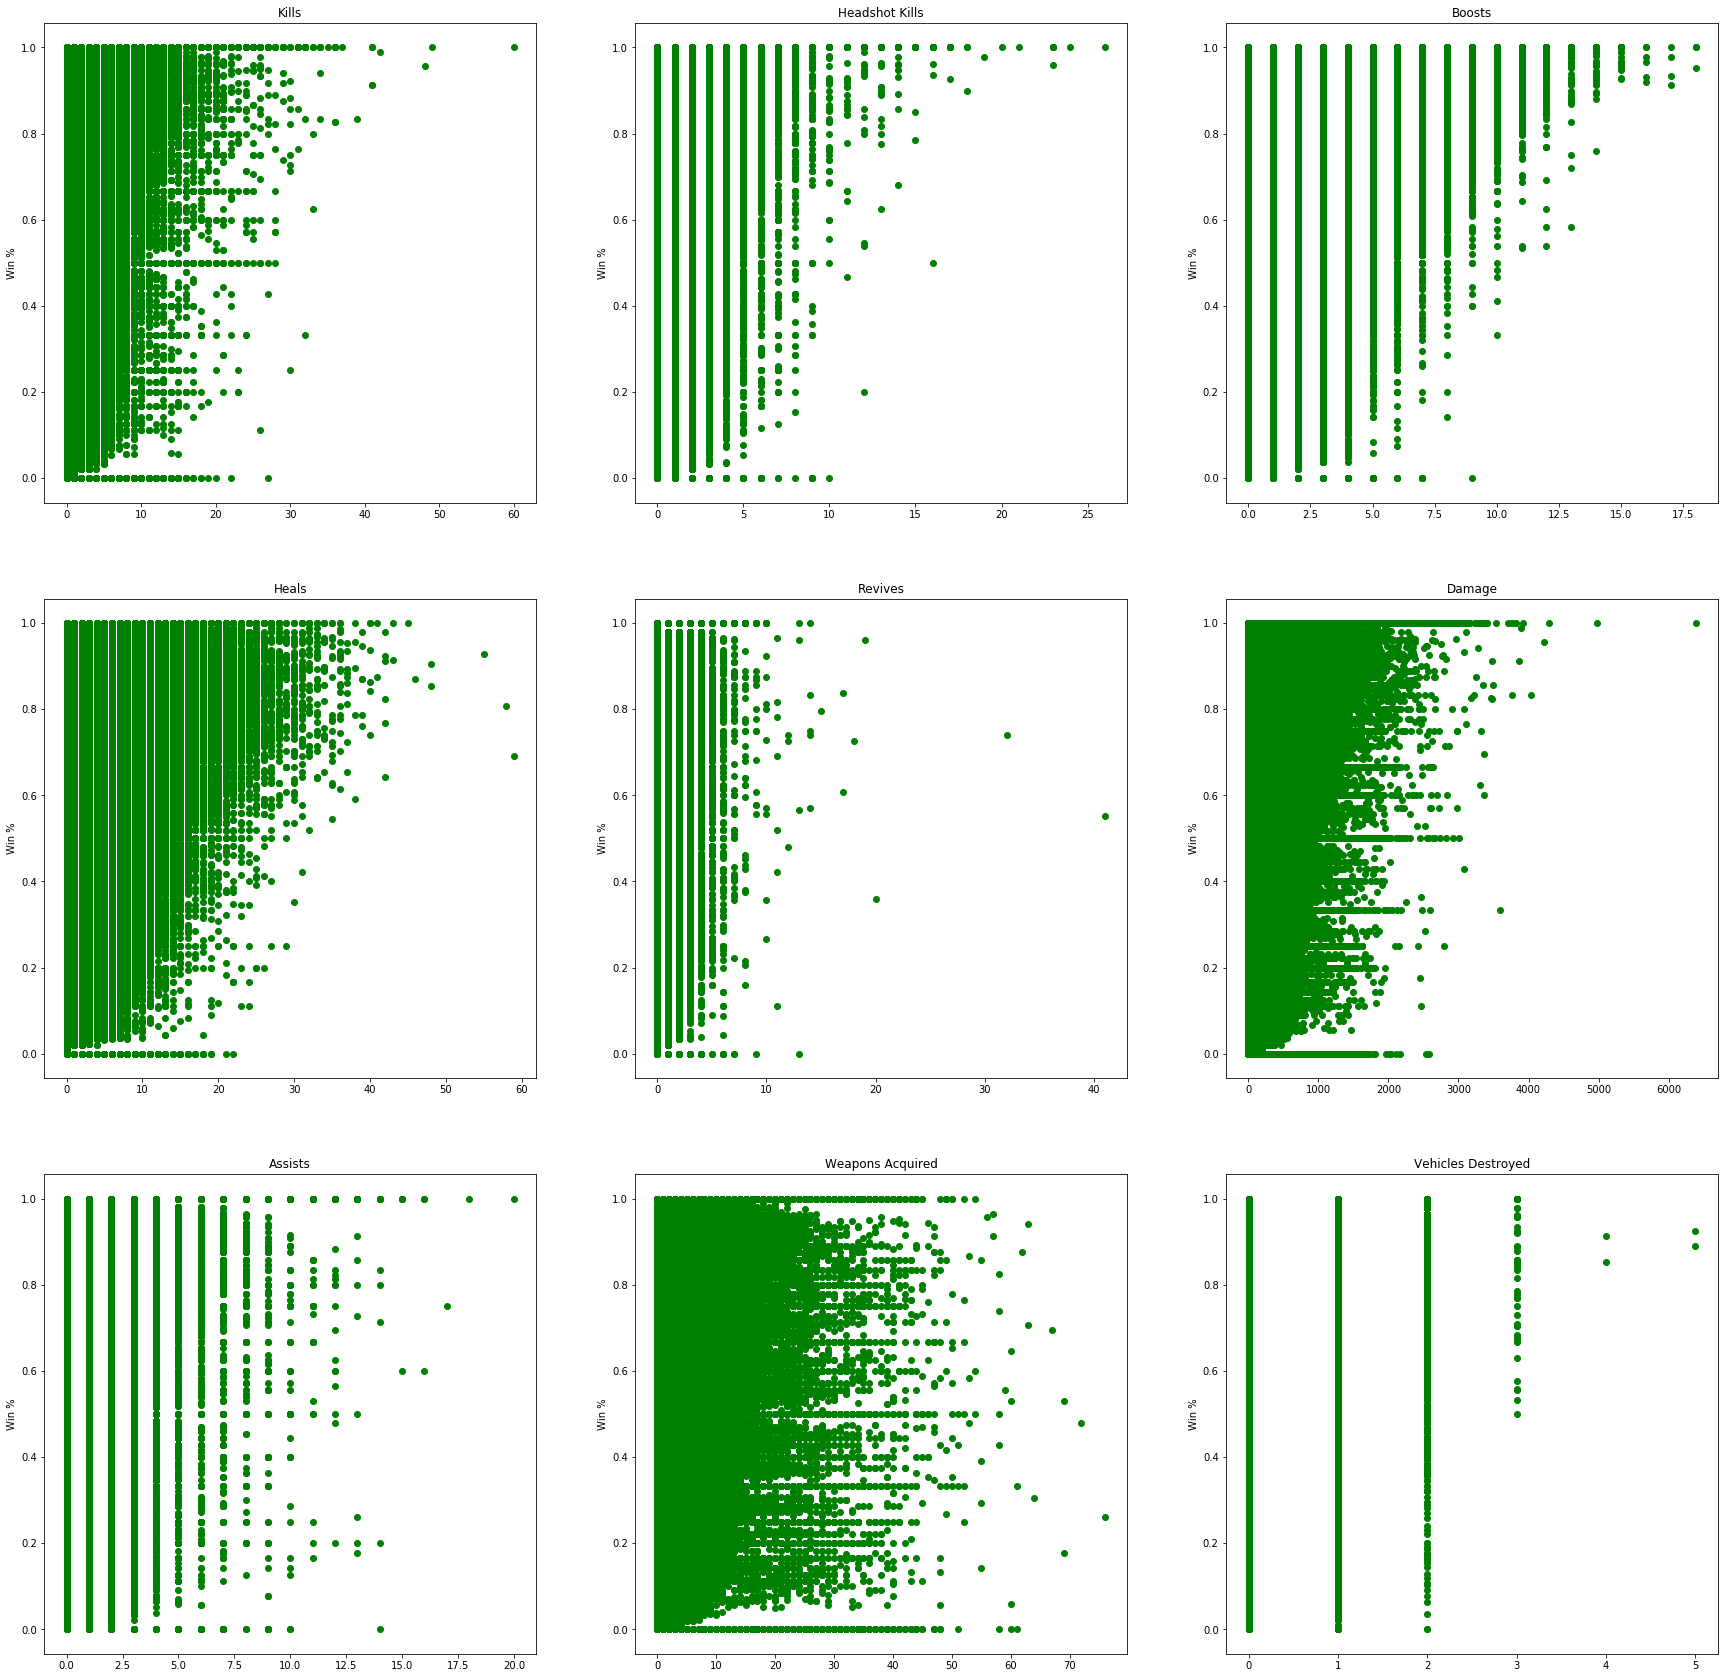

In [16]:
plt.figure(figsize=(30,30))

plt.subplot(3,3,1)
plt.scatter(x = whole_set['kills'], y = whole_set['winPlacePerc'], color='green')
plt.ylabel('Win %')
plt.title('Kills')

plt.subplot(3,3,2)
plt.scatter(x = whole_set['headshotKills'], y = whole_set['winPlacePerc'], color='green')
plt.ylabel('Win %')
plt.title('Headshot Kills')

plt.subplot(3,3,3)
plt.scatter(x = whole_set['boosts'], y = whole_set['winPlacePerc'], color='green')
plt.ylabel('Win %')
plt.title('Boosts')

plt.subplot(3,3,4)
plt.scatter(x = whole_set['heals'], y = whole_set['winPlacePerc'], color='green')
plt.ylabel('Win %')
plt.title('Heals')

plt.subplot(3,3,5)
plt.scatter(x = whole_set['revives'], y = whole_set['winPlacePerc'], color='green')
plt.ylabel('Win %')
plt.title('Revives')

plt.subplot(3,3,6)
plt.scatter(x = whole_set['damageDealt'], y = whole_set['winPlacePerc'], color='green')
plt.ylabel('Win %')
plt.title('Damage')

plt.subplot(3,3,7)
plt.scatter(x = whole_set['assists'], y = whole_set['winPlacePerc'], color='green')
plt.ylabel('Win %')
plt.title('Assists')

plt.subplot(3,3,8)
plt.scatter(x = whole_set['weaponsAcquired'], y = whole_set['winPlacePerc'], color='green')
plt.ylabel('Win %')
plt.title('Weapons Acquired')

plt.subplot(3,3,9)
plt.scatter(x = whole_set['vehicleDestroys'], y = whole_set['winPlacePerc'], color='green')
plt.ylabel('Win %')
plt.title('Vehicles Destroyed')

plt.show()

Some of the columns chosen seem to have positive correlations with Winning %: Boosts, Heals, Kills, Headshot Kills, Damage



### Question 3: 

How does distance traveled impact winning?

In [17]:
whole_set['distance'] =  whole_set['rideDistance'] + whole_set['walkDistance'] + whole_set['swimDistance']

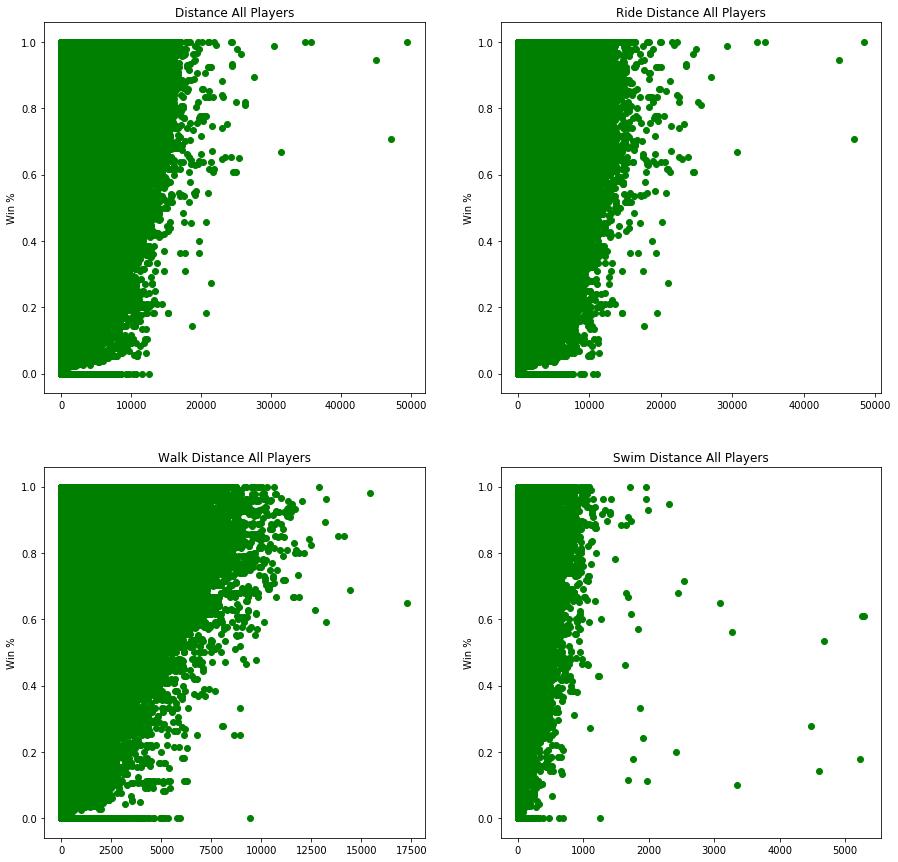

In [18]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.scatter(x = whole_set['distance'], y = whole_set['winPlacePerc'], color='green')
plt.ylabel('Win %')
plt.title('Distance All Players')

plt.subplot(2,2,2)
plt.scatter(x = whole_set['rideDistance'], y = whole_set['winPlacePerc'], color='green')
plt.ylabel('Win %')
plt.title('Ride Distance All Players')

plt.subplot(2,2,3)
plt.scatter(x = whole_set['walkDistance'], y = whole_set['winPlacePerc'], color='green')
plt.ylabel('Win %')
plt.title('Walk Distance All Players')

plt.subplot(2,2,4)
plt.scatter(x = whole_set['swimDistance'], y = whole_set['winPlacePerc'], color='green')
plt.ylabel('Win %')
plt.title('Swim Distance All Players')
plt.show()

Distance also seems to have a positive correlation with winning percentage. 

There does seem to be a certain initial distance that is common to every player.

Walking distance appears to have the strongest correlation with winning percentage.

### Further Research

Including the implications of time.  Compare past games of the same players. Look for changes in game style for those that see and increase/decrease in win percentage. It seems that the decisions that are made at different stages in the game would be something worth looking at.

Examine the game in different time portions, see what is common behavior of those that last past various points. Look for common practices of based on how long players are in the game. Are there certain things that players that make it to the halfway point usually do?

The halfway point would be when there are only half the players left in the game.  This could be done for other points as well. 

Time can be examined from both actual gameplay time, but also in terms of number of players remaining. From both vantages player behavior can be examined. Actual time is simply time on a clock, so some games will last longer than others. Looking at time in terms of number players remaining could be very telling about the quality of the players and when they are being removed from the game.

Other Ideas:

    Generate advice for players mid game
    Find common winning strategies
    In game evalution of a player's performance